# Perceptions&Interactions TP3 - Traitement d'image, Partie 2

## Introduction

*Imports et chargement d'image*

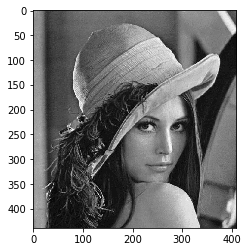

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("lena_gray.png")
plt.imshow(img)
plt.show()

### **1. Erosion**

Codez la fonction erosion(img, half_size). Cette fonction renvoie une nouvelle image dans laquelle chaque pixel (x,y) équivaut à la valeur la plus **faible** parmi les pixels voisins. Le voisinage considéré pourra être un carré allant de (x-half_size, y-half_size) à (x+half_size, y+half_size), c'est-à-dire un carré centré en (x-y) de taille (2\*half_size)+1.

On considèrera que les 3 canaux sont identiques (image en niveau de gris sur 3 canaux).

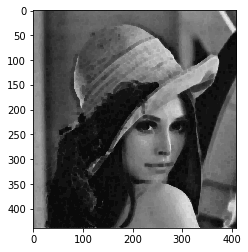

In [18]:
def erosion(img, half_size):
    new_img = img.copy()
    (h,w,c) = img.shape
    for i in range(half_size,h-half_size):
        for j in range(half_size,w-half_size):
            for k in range(c):
                min_value = new_img[i,j,k]
                
                for x in range(i-half_size, i+half_size+1):
                    for y in range(j-half_size, j+half_size+1):
                        if(min_value>img[x,y,k]):
                            min_value = img[x,y,k]
                            
                new_img[i,j,k]= min_value
 
    return new_img

img_erodee = erosion(img, 2)
plt.imshow(img_erodee)

### **2. Dilatation**

Codez la fonction dilation(img, half_size). Cette fonction, à l'instar de la fonction erosion, renvoie une nouvelle image dans laquelle chaque pixel (x,y) équivaut à la valeur la plus **élevée** parmi les pixels voisins.

On considèrera à nouveau que les 3 canaux sont identiques (image en niveau de gris sur 3 canaux).

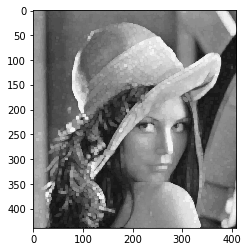

In [19]:
def dilation(img, half_size):
    new_img = img.copy()
    (h,w,c) = img.shape
    for i in range(half_size,h-half_size):
        for j in range(half_size,w-half_size):
            for k in range(c):
                max_value = new_img[i,j,k]
                for x in range(i-half_size, i+half_size+1):
                    for y in range(j-half_size, j+half_size+1):
                        if(max_value<img[x,y,k]):
                            max_value = img[x,y,k]
                            
                new_img[i,j,k]= max_value
 
    return new_img
    

img_dilatee = dilation(img, 2)
plt.imshow(img_dilatee)

#### Extraction de contours avec dilation et erosion - v1

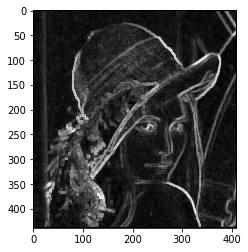

In [28]:
contours = img_dilatee - img_erodee
plt.imshow(contours)

#### Extraction de contours avec dilation et erosion - v2

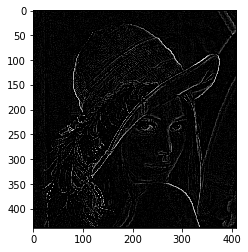

In [29]:
contours = 2*img.astype(np.int16)
contours -= img_dilatee
contours -= img_erodee
plt.imshow(np.clip(contours, a_min=0, a_max=255))

#### Extraction de contours avec dilation et erosion - v3

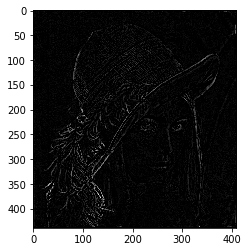

In [33]:
contours = 2*img.astype(np.int16)
contours -= erosion(dilation(img,2),2)
contours -= dilation(erosion(img,2),2)
plt.imshow(np.clip(contours, a_min=0, a_max=255))

### 3. Méthodes d'érosion et de dilatation sur une image en couleur

On dispose désormais d'une nouvelle image un peu particulière, "carré_magique.png". En effet :
- le coin supérieur gauche contient uniquement des pixels à intensité maximale (255) de rouge.
- le coin supérieur droit contient uniquement des pixels à intensité maximale (255) de vert.
- le coin inférieur gauche contient uniquement des pixels à intensité moyenne (127) de rouge et de vert.
- le coin inférieur droit contient en alternance des pixels à intensité maximale (255) de rouge et de vert.

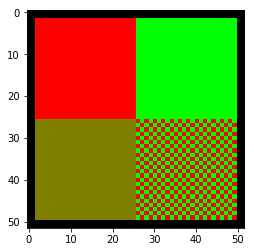

In [25]:
carre_magique = cv2.imread("carre_magique.png")
carre_magique = cv2.cvtColor(carre_magique, cv2.COLOR_BGR2RGB)
plt.imshow(carre_magique)

#### 3.1 Méthodes marginales

Tout d'abord, codez les fonctions erosion_marginal(img, half_size) et dilation_marginal(img, half_size). Ces fonctions sont identiques aux fonctions erosion et dilation codées précédemment, à la différence que les 3 canaux de couleur sont traités séparément.

In [ ]:
def erosion_marginal(img, half_size):
    # ...
    return

img_erodee = erosion_marginal(carre_magique, 2)
plt.imshow(img_erodee)

In [ ]:
def dilation_marginal(img, half_size):
    # ...
    return

img_dilatee = dilation_marginal(carre_magique, 2)
plt.imshow(img_dilatee)

#### 3.2 Méthodes lexicographiques

Tout d'abord, codez les fonctions erosion_lexico(img, half_size) et dilation_lexico(img, half_size). Cette fois-ci, les 3 canaux sont traités conjointement. Pour 2 pixels considérés, le triplet (r,g,b) considéré comme "supérieur" est celui :
- Du pixel qui a une valeur de rouge supérieure, s'il y en a un.
- Sinon, celui du pixel qui a une valeur de vert supérieure, s'il y en a un.
- Sinon, celui du pixel qui a une valeur de bleu supérieure, s'il y en a un.
- Sinon, les deux pixels sont égaux (on peut garder n'importe lequel des deux).

Pour l'érosion, on cherchera donc le triplet (r, g, b) *inférieur, en commençant par le bleu, puis le vert, puis le rouge*.

Pour la dilation, on cherchera donc le triplet (r, g, b) *supérieur, en commençant par le rouge, puis le vert, puis le bleu*.

In [ ]:
def erosion_lexico(img, half_size):
    # ...
    return

img_erodee = erosion_lexico(carre_magique, 2)
plt.imshow(img_erodee)

In [ ]:
def dilation_marginal(img, half_size):
    # ...
    return

img_dilatee = dilation_lexico(carre_magique, 2)
plt.imshow(img_dilatee)

## Exercices bonus

### 4. Features from Accelerated Segment Test (FAST)

FAST est un algorithme de détection de points d'intérêt. Pour chaque pixel, un cercle de rayon 3 des pixels "voisins" est calculé. Tout d'abord, on peut définir un tel cercle tel que :

In [ ]:
def bresenham_circle():
    circle = np.zeros((7,7))
    for i in range(circle.shape[0]):
        for j in range(circle.shape[1]):
            distance = np.sqrt((3-i)*(3-i) + (3-j)*(3-j))
            if distance > 2.5 and distance < 3.5:
                circle[i, j] = 1
    return circle
plt.imshow(bresenham_circle())

Ce cercle pourra ensuite être utilisé de manière similaire aux noyaux de la fonction convolution. Le cercle est composé de 16 pixels. Pour chaque pixel du cercle, on vérifie si sa différence d'intensité avec le pixel du centre du cercle est supérieure au threshold donné en paramètre. Si au moins 12 des 16 pixels du cercle ont une différence supérieure à ce threshold, alors le pixel est considéré comme un point d'intérêt.

La fonction fast retourne un tableau contenant n paires de coordonnées (i,j), n étant le nombre de points d'intérêts trouvés.

In [ ]:
def fast(img, threshold):
    circle = bresenham_circle()
    # ...
    return

keypoints = fast(img, 20)

img_show_keypoints = img.copy()
for kp in keypoints:
    (x,y) = kp
    img_show_keypoints[x-1:x+1, y-1:y+1, 1] = 255
plt.imshow(img_show_keypoints)

### 5. Binary Robust Independent Elementary Features (BRIEF)

BRIEF calcule des descripteurs pour chaque point d'intérêt. Tout d'abord, un flou est effectué sur l'image d'entrée pour diminuer le niveau de bruit. Il est possible d'utiliser un flou tel que codé précédemment avec les fonctions moyenne_voisins ou convolution, ou alors d'utiliser un flou gaussien à l'aide des deux lignes suivantes (si supporté par l'installation Python du CREMI...) :
> from scipy.ndimage import gaussian_filter
> 
> gaussian_filter(img, sigma=2)

On cherche alors à obtenir un descripteur, ici un vecteur de taille 128, pour chaque pixel détecté comme un point d'intérêt par FAST. On considère le voisinage de ce pixel (carré de taille 9x9). Dans ce voisinage, 128 paires de pixels (A,B) sont sélectionnées aléatoirement. Pour chacune de ces paires, si img(A) < img(B), alors le vecteur prend la valeur 1 (dans la case correspondant au numéro de la paire considérée). Dans le cas contraire, le vecteur prend la valeur 0.

In [ ]:
def brief(img, keypoints) :
    # ...

descripteurs = brief(img, keypoints)